In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features8.csv')
df=df.drop(['rolloff','zero_crossing_rate','chroma_stft','spectral_centroid','spectral_bandwidth'],axis=1)
df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,35,36,37,38,39,40,41,42,43,English Type
0,-330.49750,-5.631140e-02,-1.305158e-02,129.82634,5.654399e-04,-1.087543e-03,-4.971954,3.198393e-02,1.747995e-03,31.724367,...,-2.752345,-1.821501e-03,9.363368e-04,-4.558670,6.158995e-03,3.925575e-03,-0.389210,1.502641e-03,2.480886e-03,1
1,-322.01425,-3.602875e-03,-2.423903e-02,128.47772,-6.527488e-03,-9.426854e-03,-19.397339,-2.809185e-05,6.502475e-03,38.388363,...,-1.544018,7.676435e-03,7.934333e-04,-1.401703,5.644315e-03,-5.167238e-04,-5.707905,-2.998314e-03,1.379392e-04,0
2,-340.64084,-1.116015e-02,-1.194324e-02,97.25810,-4.836332e-03,-6.452511e-03,-5.416280,-8.388211e-03,1.998641e-03,21.495487,...,-10.403498,-6.431966e-03,6.693075e-04,0.850455,-6.629119e-04,-1.358620e-03,-11.889046,-1.693906e-03,1.692394e-04,0
3,-377.72028,2.176717e-08,-6.462130e-09,140.99352,3.265076e-08,-5.951962e-09,-15.099728,-1.020336e-09,1.360448e-09,19.818373,...,-4.418817,0.000000e+00,-2.380785e-09,-4.824514,-3.401121e-10,1.020336e-09,-3.209569,0.000000e+00,1.211649e-09,0
4,-330.79733,-9.279275e-03,3.626792e-03,98.38888,2.809254e-03,2.656345e-03,-2.800510,7.261699e-03,1.559843e-03,30.394365,...,-0.268788,-2.190437e-03,1.166201e-03,-1.180020,-6.167702e-04,-1.668033e-03,0.379468,-3.115617e-03,2.192514e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,-321.37543,2.145348e-08,-1.592251e-09,125.37948,8.045056e-09,5.195765e-09,-18.120020,6.704213e-10,8.380267e-10,24.798357,...,-5.950925,2.681685e-09,-2.430277e-09,-10.296289,6.704213e-10,5.195765e-09,-6.076538,-1.340843e-09,4.190133e-11,0
2134,-334.67572,2.969725e-03,-7.079506e-03,115.60187,2.633094e-03,-3.973560e-03,-10.139031,-6.183048e-04,-9.918020e-04,27.466146,...,-22.601553,-3.429410e-03,-3.406802e-04,-8.010031,3.347575e-04,1.722395e-04,-8.633924,2.589215e-03,-7.905327e-05,0
2135,-237.90643,2.993488e-02,-6.727289e-03,103.26113,3.290961e-02,-5.506047e-03,-23.400814,1.604700e-02,-2.868054e-04,33.581520,...,-3.508986,-5.677356e-04,-7.979744e-04,-8.856752,3.319585e-05,-1.515660e-04,-2.979901,-5.256697e-04,1.029256e-03,0
2136,-312.73398,5.774686e-02,2.157346e-04,130.01166,4.117964e-02,-3.729525e-04,-6.817431,5.208343e-03,-5.306819e-04,19.614530,...,-1.335617,-9.031654e-05,2.355064e-03,-6.252686,-1.106754e-03,1.026079e-03,-0.870628,-1.179720e-03,-9.064542e-04,0


In [3]:
X = df.iloc[:,0:39]
y = df.iloc[:,39]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1710, 39) (1710,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=40,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
43/43 [==============================] - 2s 12ms/step - loss: 1.1690 - val_loss: 1.0359
Epoch 2/1500
43/43 [==============================] - 0s 4ms/step - loss: 1.0151 - val_loss: 0.9272
Epoch 3/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.9320 - val_loss: 0.8683
Epoch 4/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.8819 - val_loss: 0.8263
Epoch 5/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.8435 - val_loss: 0.7927
Epoch 6/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.8130 - val_loss: 0.7665
Epoch 7/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7888 - val_loss: 0.7466
Epoch 8/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7699 - val_loss: 0.7305
Epoch 9/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7545 - val_loss: 0.7174
Epoch 10/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.7417 - val_loss: 0.706

43/43 [==============================] - 0s 3ms/step - loss: 0.6231 - val_loss: 0.5903
Epoch 83/1500
43/43 [==============================] - 0s 5ms/step - loss: 0.6230 - val_loss: 0.5901
Epoch 84/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6228 - val_loss: 0.5899
Epoch 85/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6226 - val_loss: 0.5896
Epoch 86/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6225 - val_loss: 0.5894
Epoch 87/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.5892
Epoch 88/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.5891
Epoch 89/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.5889
Epoch 90/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.5886
Epoch 91/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6217 - val_loss: 0.5885
Epoc

43/43 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 0.5820
Epoch 163/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 0.5820
Epoch 164/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 0.5819
Epoch 165/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6166 - val_loss: 0.5819
Epoch 166/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6166 - val_loss: 0.5818
Epoch 167/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6166 - val_loss: 0.5818
Epoch 168/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6165 - val_loss: 0.5817
Epoch 169/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.5817
Epoch 170/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.5816
Epoch 171/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5801
Epoch 243/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5801
Epoch 244/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5801
Epoch 245/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 246/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 247/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 248/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 249/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 250/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5800
Epoch 251/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 323/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 324/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 325/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 326/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 327/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 328/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5796
Epoch 329/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5795
Epoch 330/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5795
Epoch 331/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5794
Epoch 403/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5794
Epoch 404/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 405/1500
43/43 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 406/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 407/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 408/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5794
Epoch 409/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 410/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5794
Epoch 411/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 483/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 484/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 485/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5793
Epoch 486/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 487/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 488/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 489/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 490/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 491/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 563/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 564/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 565/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 566/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 567/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 568/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 569/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 570/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.5792
Epoch 571/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 643/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 644/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 645/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 646/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 647/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 648/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 649/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 650/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 651/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 723/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 724/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 725/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 726/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 727/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 728/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 729/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 730/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 731/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 803/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 804/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 805/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 806/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 807/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 808/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 809/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 810/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 811/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 883/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 884/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 885/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 886/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 887/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 888/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 889/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 890/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 891/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 963/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 964/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 965/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 966/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 967/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 968/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 969/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 970/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 971/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1043/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1044/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1045/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1046/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1047/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1048/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1049/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1050/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1051/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1122/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1123/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1124/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1125/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1126/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1127/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1128/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1129/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1130/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1201/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1202/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 1203/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1204/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1205/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1206/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1207/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1208/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1209/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1280/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1281/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1282/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1283/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1284/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1285/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1286/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1287/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1288/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1359/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1360/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 1361/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1362/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1363/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1364/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1365/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1366/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1367/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1438/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1439/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1440/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1441/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1442/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1443/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5792
Epoch 1444/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1445/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5791
Epoch 1446/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8457943925233645
Precision:  0.7153681544239672
Recall:  0.8457943925233645
F1-score:  0.7751330888441973
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       362
           1       0.00      0.00      0.00        66

    accuracy                           0.85       428
   macro avg       0.42      0.50      0.46       428
weighted avg       0.72      0.85      0.78       428



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 84.58%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


# Print classification report
print(classification_report(y_test, y_pred))





Accuracy:  0.8457943925233645
Precision:  0.7994678710369807
Recall:  0.8457943925233645
F1-score:  0.7945173862045479
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       362
           1       0.50      0.08      0.13        66

    accuracy                           0.85       428
   macro avg       0.68      0.53      0.52       428
weighted avg       0.80      0.85      0.79       428



# CNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [11]:
X = df.iloc[:,0:39]
y = df.iloc[:,39]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [13]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [14]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=40,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
38/38 [==============================] - 2s 18ms/step - loss: 0.8036 - accuracy: 0.7540 - val_loss: 0.4932 - val_accuracy: 0.8131
Epoch 2/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.5133 - accuracy: 0.8015 - val_loss: 0.5233 - val_accuracy: 0.8255
Epoch 3/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.4874 - accuracy: 0.8048 - val_loss: 0.4538 - val_accuracy: 0.8271
Epoch 4/1500
38/38 [==============================] - 0s 12ms/step - loss: 0.4671 - accuracy: 0.8189 - val_loss: 0.4665 - val_accuracy: 0.8287
Epoch 5/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.4489 - accuracy: 0.8255 - val_loss: 0.4472 - val_accuracy: 0.8287
Epoch 6/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.4537 - accuracy: 0.8229 - val_loss: 0.4509 - val_accuracy: 0.8302
Epoch 7/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.4514 - accuracy: 0.8222 - val_loss: 0.4429 - val_accuracy: 0.8287

38/38 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 0.8603 - val_loss: 0.4777 - val_accuracy: 0.8333
Epoch 59/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy: 0.8656 - val_loss: 0.4871 - val_accuracy: 0.8115
Epoch 60/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.3140 - accuracy: 0.8603 - val_loss: 0.4888 - val_accuracy: 0.7819
Epoch 61/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.3018 - accuracy: 0.8757 - val_loss: 0.4894 - val_accuracy: 0.8146
Epoch 62/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.3149 - accuracy: 0.8630 - val_loss: 0.4948 - val_accuracy: 0.8037
Epoch 63/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.2985 - accuracy: 0.8737 - val_loss: 0.5037 - val_accuracy: 0.8006
Epoch 64/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.3035 - accuracy: 0.8636 - val_loss: 0.5005 - val_accuracy: 0.7991
Epoch 65/1500

38/38 [==============================] - 0s 9ms/step - loss: 0.1295 - accuracy: 0.9459 - val_loss: 0.8686 - val_accuracy: 0.7819
Epoch 116/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1358 - accuracy: 0.9465 - val_loss: 0.8959 - val_accuracy: 0.7991
Epoch 117/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1310 - accuracy: 0.9519 - val_loss: 0.8336 - val_accuracy: 0.7757
Epoch 118/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1193 - accuracy: 0.9525 - val_loss: 0.9188 - val_accuracy: 0.7882
Epoch 119/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1208 - accuracy: 0.9519 - val_loss: 0.8967 - val_accuracy: 0.7944
Epoch 120/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9505 - val_loss: 0.8808 - val_accuracy: 0.7757
Epoch 121/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1339 - accuracy: 0.9425 - val_loss: 0.8393 - val_accuracy: 0.7710
Epoch 1

Epoch 172/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0498 - accuracy: 0.9820 - val_loss: 1.2299 - val_accuracy: 0.7804
Epoch 173/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 1.3422 - val_accuracy: 0.7897
Epoch 174/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0646 - accuracy: 0.9779 - val_loss: 1.2650 - val_accuracy: 0.7741
Epoch 175/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 1.2915 - val_accuracy: 0.7804
Epoch 176/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0680 - accuracy: 0.9753 - val_loss: 1.3598 - val_accuracy: 0.7648
Epoch 177/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9793 - val_loss: 1.2949 - val_accuracy: 0.7850
Epoch 178/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9793 - val_loss: 1.3430 - val_accurac

Epoch 229/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 1.5733 - val_accuracy: 0.7757
Epoch 230/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9746 - val_loss: 1.4316 - val_accuracy: 0.7648
Epoch 231/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9799 - val_loss: 1.6056 - val_accuracy: 0.7726
Epoch 232/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0464 - accuracy: 0.9799 - val_loss: 1.5802 - val_accuracy: 0.7804
Epoch 233/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9873 - val_loss: 1.6141 - val_accuracy: 0.7741
Epoch 234/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0470 - accuracy: 0.9873 - val_loss: 1.5785 - val_accuracy: 0.7773
Epoch 235/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0585 - accuracy: 0.9846 - val_loss: 1.5317 - val_accuracy:

Epoch 286/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9880 - val_loss: 1.8240 - val_accuracy: 0.7632
Epoch 287/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0400 - accuracy: 0.9813 - val_loss: 1.8676 - val_accuracy: 0.7695
Epoch 288/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 1.8796 - val_accuracy: 0.7866
Epoch 289/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0337 - accuracy: 0.9880 - val_loss: 1.7106 - val_accuracy: 0.7819
Epoch 290/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0379 - accuracy: 0.9853 - val_loss: 1.7757 - val_accuracy: 0.7601
Epoch 291/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.9880 - val_loss: 1.7544 - val_accuracy: 0.7757
Epoch 292/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 1.7575 - val_acc

Epoch 343/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 1.8437 - val_accuracy: 0.7632
Epoch 344/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 1.9146 - val_accuracy: 0.7741
Epoch 345/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9893 - val_loss: 2.0306 - val_accuracy: 0.7757
Epoch 346/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 1.9768 - val_accuracy: 0.7788
Epoch 347/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.9900 - val_loss: 1.9318 - val_accuracy: 0.7710
Epoch 348/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0178 - accuracy: 0.9933 - val_loss: 2.0276 - val_accuracy: 0.7632
Epoch 349/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9906 - val_loss: 2.0769 - val_accuracy

Epoch 400/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9913 - val_loss: 2.0619 - val_accuracy: 0.7679
Epoch 401/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.9940 - val_loss: 2.0666 - val_accuracy: 0.7788
Epoch 402/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.9906 - val_loss: 1.9759 - val_accuracy: 0.7773
Epoch 403/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 1.9876 - val_accuracy: 0.7695
Epoch 404/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 1.9923 - val_accuracy: 0.7648
Epoch 405/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 0.9900 - val_loss: 2.0150 - val_accuracy: 0.7695
Epoch 406/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.9913 - val_loss: 2.1144 - val_accuracy:

Epoch 457/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.9940 - val_loss: 2.0628 - val_accuracy: 0.7804
Epoch 458/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.9893 - val_loss: 2.0235 - val_accuracy: 0.7866
Epoch 459/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 2.0668 - val_accuracy: 0.7679
Epoch 460/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 2.0710 - val_accuracy: 0.7648
Epoch 461/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0205 - accuracy: 0.9926 - val_loss: 2.0391 - val_accuracy: 0.7804
Epoch 462/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.9940 - val_loss: 2.0514 - val_accuracy: 0.7695
Epoch 463/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 2.0615 - val_accuracy:

Epoch 514/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0248 - accuracy: 0.9886 - val_loss: 2.1338 - val_accuracy: 0.7741
Epoch 515/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 2.0543 - val_accuracy: 0.7617
Epoch 516/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9900 - val_loss: 2.0883 - val_accuracy: 0.7679
Epoch 517/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9913 - val_loss: 2.2619 - val_accuracy: 0.7617
Epoch 518/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 2.1828 - val_accuracy: 0.7648
Epoch 519/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 2.2209 - val_accuracy: 0.7835
Epoch 520/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 2.0745 - val_accuracy:

Epoch 571/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 0.9933 - val_loss: 2.5511 - val_accuracy: 0.7850
Epoch 572/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 2.3120 - val_accuracy: 0.7539
Epoch 573/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9913 - val_loss: 2.3860 - val_accuracy: 0.7477
Epoch 574/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 2.3136 - val_accuracy: 0.7632
Epoch 575/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9900 - val_loss: 2.1758 - val_accuracy: 0.7648
Epoch 576/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 2.3275 - val_accuracy: 0.7741
Epoch 577/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 0.9933 - val_loss: 2.2118 - val_accuracy

Epoch 628/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 2.3348 - val_accuracy: 0.7741
Epoch 629/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0196 - accuracy: 0.9920 - val_loss: 2.4445 - val_accuracy: 0.7726
Epoch 630/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 2.5832 - val_accuracy: 0.7632
Epoch 631/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9953 - val_loss: 2.6151 - val_accuracy: 0.7648
Epoch 632/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0419 - accuracy: 0.9886 - val_loss: 2.3336 - val_accuracy: 0.7819
Epoch 633/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.9940 - val_loss: 2.3538 - val_accuracy: 0.7757
Epoch 634/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 2.3888 - val_accuracy:

Epoch 685/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 2.3217 - val_accuracy: 0.7399
Epoch 686/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 2.4196 - val_accuracy: 0.7508
Epoch 687/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.9960 - val_loss: 2.5189 - val_accuracy: 0.7695
Epoch 688/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 0.9947 - val_loss: 2.4101 - val_accuracy: 0.7726
Epoch 689/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.9933 - val_loss: 2.3553 - val_accuracy: 0.7632
Epoch 690/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9913 - val_loss: 2.5010 - val_accuracy: 0.7804
Epoch 691/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 2.3494 - val_accuracy:

Epoch 742/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9953 - val_loss: 2.4671 - val_accuracy: 0.7508
Epoch 743/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9940 - val_loss: 2.4018 - val_accuracy: 0.7695
Epoch 744/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 2.4789 - val_accuracy: 0.7819
Epoch 745/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.9947 - val_loss: 2.5644 - val_accuracy: 0.7664
Epoch 746/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9913 - val_loss: 2.5660 - val_accuracy: 0.7788
Epoch 747/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.9947 - val_loss: 2.4661 - val_accuracy: 0.7632
Epoch 748/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 2.6362 - val_accuracy:

Epoch 799/1500
38/38 [==============================] - 1s 15ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 2.5977 - val_accuracy: 0.7819
Epoch 800/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 2.4509 - val_accuracy: 0.7648
Epoch 801/1500
38/38 [==============================] - 0s 12ms/step - loss: 0.0225 - accuracy: 0.9940 - val_loss: 2.4136 - val_accuracy: 0.7710
Epoch 802/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 2.4514 - val_accuracy: 0.7664
Epoch 803/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.9960 - val_loss: 2.5496 - val_accuracy: 0.7710
Epoch 804/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 2.6370 - val_accuracy: 0.7788
Epoch 805/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 2.5652 - val_accurac

Epoch 856/1500
38/38 [==============================] - 1s 14ms/step - loss: 0.0147 - accuracy: 0.9967 - val_loss: 2.3921 - val_accuracy: 0.7788
Epoch 857/1500
38/38 [==============================] - 1s 13ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 2.4286 - val_accuracy: 0.7773
Epoch 858/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9940 - val_loss: 2.3497 - val_accuracy: 0.7866
Epoch 859/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 2.3647 - val_accuracy: 0.7788
Epoch 860/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9940 - val_loss: 2.4100 - val_accuracy: 0.7741
Epoch 861/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 2.3362 - val_accuracy: 0.7773
Epoch 862/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 0.9973 - val_loss: 2.4388 - val_accurac

Epoch 913/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 2.4597 - val_accuracy: 0.7819
Epoch 914/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 2.3662 - val_accuracy: 0.7897
Epoch 915/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 2.4215 - val_accuracy: 0.7819
Epoch 916/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.9973 - val_loss: 2.5465 - val_accuracy: 0.7710
Epoch 917/1500
38/38 [==============================] - 1s 15ms/step - loss: 0.0198 - accuracy: 0.9953 - val_loss: 2.4763 - val_accuracy: 0.7757
Epoch 918/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.9973 - val_loss: 2.5614 - val_accuracy: 0.7850
Epoch 919/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 2.4308 - val_accuracy

38/38 [==============================] - 1s 15ms/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 2.3275 - val_accuracy: 0.7695
Epoch 970/1500
38/38 [==============================] - 1s 15ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 2.3249 - val_accuracy: 0.7741
Epoch 971/1500
38/38 [==============================] - 1s 15ms/step - loss: 0.0219 - accuracy: 0.9953 - val_loss: 2.3283 - val_accuracy: 0.7710
Epoch 972/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.9967 - val_loss: 2.5450 - val_accuracy: 0.7913
Epoch 973/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 2.4740 - val_accuracy: 0.7788
Epoch 974/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.9980 - val_loss: 2.5017 - val_accuracy: 0.7866
Epoch 975/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 2.5658 - val_accuracy: 0.7679
Epoc

Epoch 1026/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 2.4273 - val_accuracy: 0.7788
Epoch 1027/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 2.5422 - val_accuracy: 0.7866
Epoch 1028/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 2.2308 - val_accuracy: 0.7757
Epoch 1029/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.9973 - val_loss: 2.3407 - val_accuracy: 0.7850
Epoch 1030/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 2.3726 - val_accuracy: 0.7788
Epoch 1031/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 2.4193 - val_accuracy: 0.7664
Epoch 1032/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 2.5780 - val_ac

38/38 [==============================] - 0s 9ms/step - loss: 0.0037 - accuracy: 0.9980 - val_loss: 2.6491 - val_accuracy: 0.7835
Epoch 1083/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 2.5268 - val_accuracy: 0.7866
Epoch 1084/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 2.5883 - val_accuracy: 0.7788
Epoch 1085/1500
38/38 [==============================] - 1s 15ms/step - loss: 0.0071 - accuracy: 0.9973 - val_loss: 2.5681 - val_accuracy: 0.7882
Epoch 1086/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 2.4942 - val_accuracy: 0.7773
Epoch 1087/1500
38/38 [==============================] - 1s 14ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 2.6736 - val_accuracy: 0.7928
Epoch 1088/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 2.6701 - val_accuracy: 0.785

38/38 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 2.8222 - val_accuracy: 0.7866
Epoch 1139/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 2.7708 - val_accuracy: 0.7788
Epoch 1140/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.9933 - val_loss: 2.7877 - val_accuracy: 0.7835
Epoch 1141/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.9940 - val_loss: 2.8576 - val_accuracy: 0.7679
Epoch 1142/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.9947 - val_loss: 2.8380 - val_accuracy: 0.7726
Epoch 1143/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 2.9010 - val_accuracy: 0.7850
Epoch 1144/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.9960 - val_loss: 2.7216 - val_accuracy: 0.7788
E

38/38 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 2.8268 - val_accuracy: 0.7773
Epoch 1195/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.9953 - val_loss: 2.6577 - val_accuracy: 0.7679
Epoch 1196/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 2.5985 - val_accuracy: 0.7788
Epoch 1197/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 2.8049 - val_accuracy: 0.7866
Epoch 1198/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9967 - val_loss: 2.7400 - val_accuracy: 0.7866
Epoch 1199/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 2.7740 - val_accuracy: 0.7819
Epoch 1200/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 2.6991 - val_accuracy: 0.7757
E

38/38 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9933 - val_loss: 2.5780 - val_accuracy: 0.7819
Epoch 1251/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 2.6441 - val_accuracy: 0.7882
Epoch 1252/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.9980 - val_loss: 2.7128 - val_accuracy: 0.7866
Epoch 1253/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 2.7942 - val_accuracy: 0.7928
Epoch 1254/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.9973 - val_loss: 2.7261 - val_accuracy: 0.7960
Epoch 1255/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 2.6953 - val_accuracy: 0.7835
Epoch 1256/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 2.7219 - val_accuracy: 0.78

38/38 [==============================] - 0s 10ms/step - loss: 0.0101 - accuracy: 0.9960 - val_loss: 2.6226 - val_accuracy: 0.7570
Epoch 1307/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 2.6387 - val_accuracy: 0.7601
Epoch 1308/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 2.6325 - val_accuracy: 0.7570
Epoch 1309/1500
38/38 [==============================] - 1s 14ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 2.7218 - val_accuracy: 0.7741
Epoch 1310/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0088 - accuracy: 0.9953 - val_loss: 2.8348 - val_accuracy: 0.7819
Epoch 1311/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9059 - val_accuracy: 0.7835
Epoch 1312/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0163 - accuracy: 0.9926 - val_loss: 2.7575 - val_accuracy: 0.

38/38 [==============================] - 0s 12ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 2.7663 - val_accuracy: 0.7882
Epoch 1363/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0103 - accuracy: 0.9947 - val_loss: 2.8263 - val_accuracy: 0.7835
Epoch 1364/1500
38/38 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 2.8006 - val_accuracy: 0.7804
Epoch 1365/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 2.9577 - val_accuracy: 0.7850
Epoch 1366/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 2.8421 - val_accuracy: 0.7741
Epoch 1367/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 2.8742 - val_accuracy: 0.7804
Epoch 1368/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 2.7554 - val_accuracy: 0

38/38 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9980 - val_loss: 3.0589 - val_accuracy: 0.7819
Epoch 1419/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.9953 - val_loss: 2.5602 - val_accuracy: 0.7508
Epoch 1420/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 0.9953 - val_loss: 2.5913 - val_accuracy: 0.7601
Epoch 1421/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 2.8122 - val_accuracy: 0.7741
Epoch 1422/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 0.9953 - val_loss: 2.9009 - val_accuracy: 0.7788
Epoch 1423/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0129 - accuracy: 0.9973 - val_loss: 2.8708 - val_accuracy: 0.7882
Epoch 1424/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 2.7709 - val_accuracy: 0

38/38 [==============================] - 0s 10ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 2.8349 - val_accuracy: 0.7773
Epoch 1475/1500
38/38 [==============================] - 0s 12ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 2.8828 - val_accuracy: 0.7710
Epoch 1476/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 2.9363 - val_accuracy: 0.7710
Epoch 1477/1500
38/38 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 2.8888 - val_accuracy: 0.7773
Epoch 1478/1500
38/38 [==============================] - 1s 14ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 2.9591 - val_accuracy: 0.7819
Epoch 1479/1500
38/38 [==============================] - 1s 14ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 2.9813 - val_accuracy: 0.7866
Epoch 1480/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0302 - accuracy: 0.9953 - val_loss: 3.0858 - val_accuracy: 0

In [15]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 3ms/step
Accuracy: 0.778816199376947


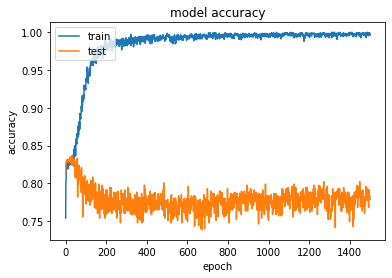

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

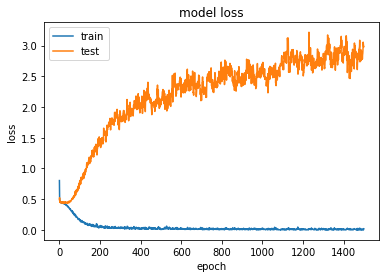

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from pycm import ConfusionMatrix


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87       532
           1       0.28      0.19      0.23       110

    accuracy                           0.78       642
   macro avg       0.56      0.55      0.55       642
weighted avg       0.75      0.78      0.76       642

Predict   0         1         
Actual
0         479       53        

1         89        21        





Overall Statistics : 

95% CI                                                            (0.74671,0.81092)
ACC Macro                                                         0.77882
ARI                                                               0.07363
AUNP                                                              0.54564
AUNU                                                              0.54564
Bangdiwala B                                                      0.7408
Bennett S                                                         0.55763
CBA    

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))
print("Precision: ", precision_score(y_test_encoded, y_pred_classes, average='weighted'))
print("Recall: ", recall_score(y_test_encoded, y_pred_classes, average='weighted'))
print("F1-score: ", f1_score(y_test_encoded, y_pred_classes, average='weighted'))


# Print classification report
print(classification_report(y_test_encoded, y_pred_classes))


Accuracy:  0.778816199376947
Precision:  0.7474409054309016
Recall:  0.778816199376947
F1-score:  0.760798024946745
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       532
           1       0.28      0.19      0.23       110

    accuracy                           0.78       642
   macro avg       0.56      0.55      0.55       642
weighted avg       0.75      0.78      0.76       642

